## load libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## load data

In [2]:
boundary_and_nonboundary_encoding_fc_pd=pd.read_csv('boundary_and_nonboundary_encoding_fc_pd.csv')
boundary_and_nonboundary_encoding_fc_details=pd.read_csv('boundary_and_nonboundary_encoding_fc_details.csv')
subjlist_full = pd.read_excel('subjlist.xlsx')

subject_list = subjlist_full['subj_id'].unique()

In [3]:
boundary_and_nonboundary_encoding_fc_pd['delay'] = boundary_and_nonboundary_encoding_fc_pd['delay'].astype('str') 

## recall success

### organize dataframe

In [11]:
data1= boundary_and_nonboundary_encoding_fc_pd.groupby(by = ['subject','window','event_recalled'],as_index=False).mean()
data1['event_recalled'] = data1['event_recalled'].astype('int').astype('str')
data1_pivot =data1.pivot_table(index='subject', columns=['window','event_recalled'],values='fc')

# create new columns
new_cols = [ ('event_start', '0'),
 ('event_start', '1'),
 ('event_middle', '0'),
 ('event_middle', '1'),
 ('offset', '0'),
 ('offset', '1')]

data1_pivot=data1_pivot[new_cols]

# add jitter on x-axis to the datapoints
jitter = 0.0
data1_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=data1_pivot.values.shape), columns=data1_pivot.columns,index =data1_pivot.index )
data1_jitter += np.arange(len(data1_pivot.columns))/2-.25

# organize again
data1_jitter[('event_start', '0')]=data1_jitter[('event_start', '0')]+.05
data1_jitter[('event_start', '1')]=data1_jitter[('event_start', '1')]-.05
data1_jitter[('event_middle', '0')]=data1_jitter[('event_middle', '0')]+.05
data1_jitter[('event_middle', '1')]=data1_jitter[('event_middle', '1')]-.05
data1_jitter[('offset', '0')]=data1_jitter[('offset', '0')]+.05
data1_jitter[('offset', '1')]=data1_jitter[('offset', '1')]-.05

<Figure size 72x360 with 0 Axes>

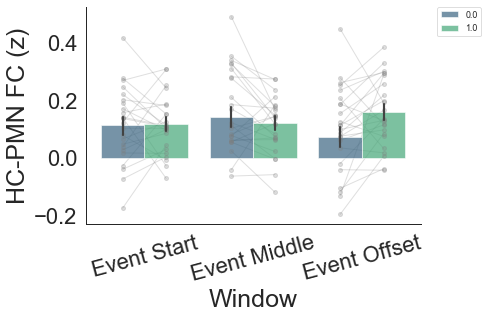

In [22]:
sns.set_theme(context = 'paper')
sns.set_style('white')
sns.set_palette('viridis',2,1)
plt.figure(figsize=(1,5))

fig, ax = plt.subplots()
for col in data1_pivot:
    ax.plot(data1_jitter[col],data1_pivot[col], 'o', alpha=.25, zorder=1, ms=4,
            markeredgewidth=1,markeredgecolor='grey',markerfacecolor='grey')
ax.set_xticks(range(len(data1_pivot.columns)))
ax.set_xticklabels(data1_pivot.columns)

sns.barplot(x = 'window', y = 'fc', hue = 'event_recalled',
           data =boundary_and_nonboundary_encoding_fc_pd,order=['event_start','event_middle','offset'],alpha = 0.7)

for idx in data1_pivot.index:
    ax.plot(data1_jitter.loc[idx,'event_middle'], data1_pivot.loc[idx,'event_middle'], color = 'grey', linewidth = 1,alpha=.25, zorder=-1)
    ax.plot(data1_jitter.loc[idx,'event_start'], data1_pivot.loc[idx,'event_start'], color = 'grey', linewidth = 1,alpha=.25, zorder=-1)
    ax.plot(data1_jitter.loc[idx,'offset'], data1_pivot.loc[idx,'offset'], color = 'grey', linewidth = 1,alpha=.25, zorder=-1)
    
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# set labels
ax.set_xticklabels(['Event Start','Event Middle','Event Offset'],rotation = 15)
ax.set(xlabel='Window', ylabel='HC-PMN FC (z)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#modify individual font size of elements
plt.xlabel('Window', fontsize=25);
plt.ylabel('HC-PMN FC (z)', fontsize=25);
plt.tick_params(axis='both', which='major', labelsize=22)

fig.savefig("hc-pmn-fc-recall-by-window.pdf",dpi=300,bbox_inches="tight")

# recall details

In [16]:
model_data3 = boundary_and_nonboundary_encoding_fc_details[boundary_and_nonboundary_encoding_fc_details['window']=='offset']
model_data3['fc'] = model_data3['fc'].astype('float')
model_data3['total_details_log'] = model_data3['total_details_log'].astype('float')

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
model_data3

,Unnamed: 0,central_d,delay,event_label,event_length,event_recalled,events,fc,movie,net1_label,...,path_length,percent_events,peri_d,subject,window,boundary_diff,total_details,total_details_log,peri_d_log,fc_mc
0,0,4.0,0,1,48.0,1.0,1,-0.224563,barmaid,postHC,...,NaN,0.714286,6.0,sub-000,offset,0.442102,10.0,2.302585,1.791759,-0.372603
1,2,3.5,0,3,51.0,1.0,3,0.002101,barmaid,postHC,...,NaN,0.714286,5.0,sub-000,offset,0.468280,8.5,2.140066,1.609438,-0.145939
2,3,1.0,0,4,24.0,1.0,4,0.357570,barmaid,postHC,...,NaN,0.714286,4.5,sub-000,offset,-0.676956,5.5,1.704748,1.504077,0.209531
3,4,1.0,0,5,91.0,1.0,5,0.317305,barmaid,postHC,...,NaN,0.714286,2.0,sub-000,offset,0.647896,3.0,1.098612,0.693147,0.169265
4,5,0.5,0,6,41.0,1.0,6,0.142376,barmaid,postHC,...,NaN,0.714286,4.5,sub-000,offset,1.188114,5.0,1.609438,1.504077,-0.005664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1338,0.5,0,9,71.0,1.0,9,-0.240540,bluestreets,antHC,...,NaN,0.854286,1.5,sub-130,offset,1.813871,2.0,0.693147,0.405465,-0.179893
904,1339,4.0,0,10,75.0,1.0,10,-0.244452,bluestreets,antHC,...,NaN,0.854286,3.5,sub-130,offset,2.404233,7.5,2.014903,1.252763,-0.183805
905,1340,4.5,0,11,59.0,1.0,11,0.485506,bluestreets,antHC,...,NaN,0.854286,4.0,sub-130,offset,-0.727889,8.5,2.140066,1.386294,0.546153
906,1341,1.5,0,12,20.0,1.0,12,0.133991,bluestreets,antHC,...,NaN,0.854286,0.0,sub-130,offset,-0.047684,1.5,0.405465,-inf,0.194638


/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/ale

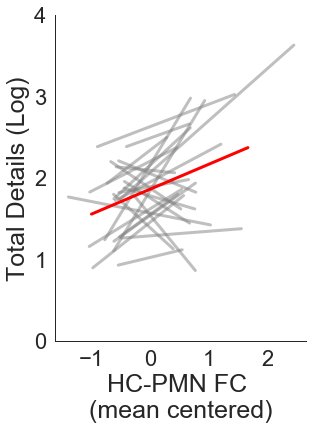

In [18]:
num_subs = 24
temp = model_data3.groupby(by=['subject','delay','window','events'],as_index=False).mean()
fig, ax = plt.subplots(figsize=(4.5, 6))
for sub in range(num_subs):
    sns.regplot(x = 'fc_mc', y = 'total_details_log',ci = 0,
               data = model_data3[model_data3['window']=='offset'][model_data3['delay']==2][model_data3['subject']==subject_list[sub]],
              line_kws={'alpha': .5,'linewidth':3},scatter_kws={'alpha': .0},color='grey')
plt.plot([-1,1.672],[1.555,2.3704],color='red',linewidth=3)
#sns.regplot(x = 'fc_mc', y = 'total_details_log',ci=0,
#           data = temp[temp['window']=='offset'][temp['delay']=='2'],scatter_kws={'alpha': 0},ax=ax,color='red')
plt.ylim([0, 4])
plt.ylabel('Total Details (Log)')
plt.xlabel('HC-PMN FC \n(mean centered)')


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([-1, 0 , 1,2])

#modify individual font size of elements
plt.xlabel('HC-PMN FC \n(mean centered)', fontsize=25);
plt.ylabel('Total Details (Log)', fontsize=25);
plt.tick_params(axis='both', which='major', labelsize=22)

fig.savefig("hc-pmn-fc-details.pdf",dpi=300,bbox_inches="tight")